#Wine Classification Using Nueral Network
This lab work assignment performs a systematic analysis on the performance of neural network models in classifying the type of wine 
(red wine / white wine). 5 models are designed, of which the best will be further tuned to make the best possible prediction.


In [16]:
# import libraries

import pandas as pd
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from keras import optimizers
from sklearn.model_selection import train_test_split
from IPython.display import SVG, display



#Data Preperation
In this section, basic data preparation steps have been taken including:
* Load
* Merge
* Split for training and testing

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Load the dataset
dataR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';')

# Add a new column 'WineType'(boolean) - red wine = 1
dataR['WineType'] = 1

# Display the resulting dataframe
dataR


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [19]:
# Load the dataset
dataW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=';')

# Add a new column 'WineType'(boolean) - white wine = 0
dataW ['WineType'] = 0

# Display the resulting dataframe
dataW

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [20]:
#Mege the two data sets
data = pd.merge(dataW, dataR, how='outer')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
3,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
4,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [21]:
# Assign WineType as the target 
y = data['WineType']
x = data.drop(columns = ['WineType'])

# Splitting the data into train and test sets
#Stratify since red and white data are imbalanced
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)


#Model Building 1 (simple neural network)
The first model is a simple neural network that contains 2 layers. The purpose of this is to set a base reference for experimenting with other neural network architectures. The architecture of the model is such that: 

* Fully connected neural network (Dense)
* First layer   - 2 neurons -AF: RELU
* Second layer  - 1 neuron  -AF: Sigmoid



In [22]:
# Define the model:
from keras.models import Sequential
from keras.layers import Dense
model_1 = Sequential()
model_1.add(Dense(2, input_dim=12, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None


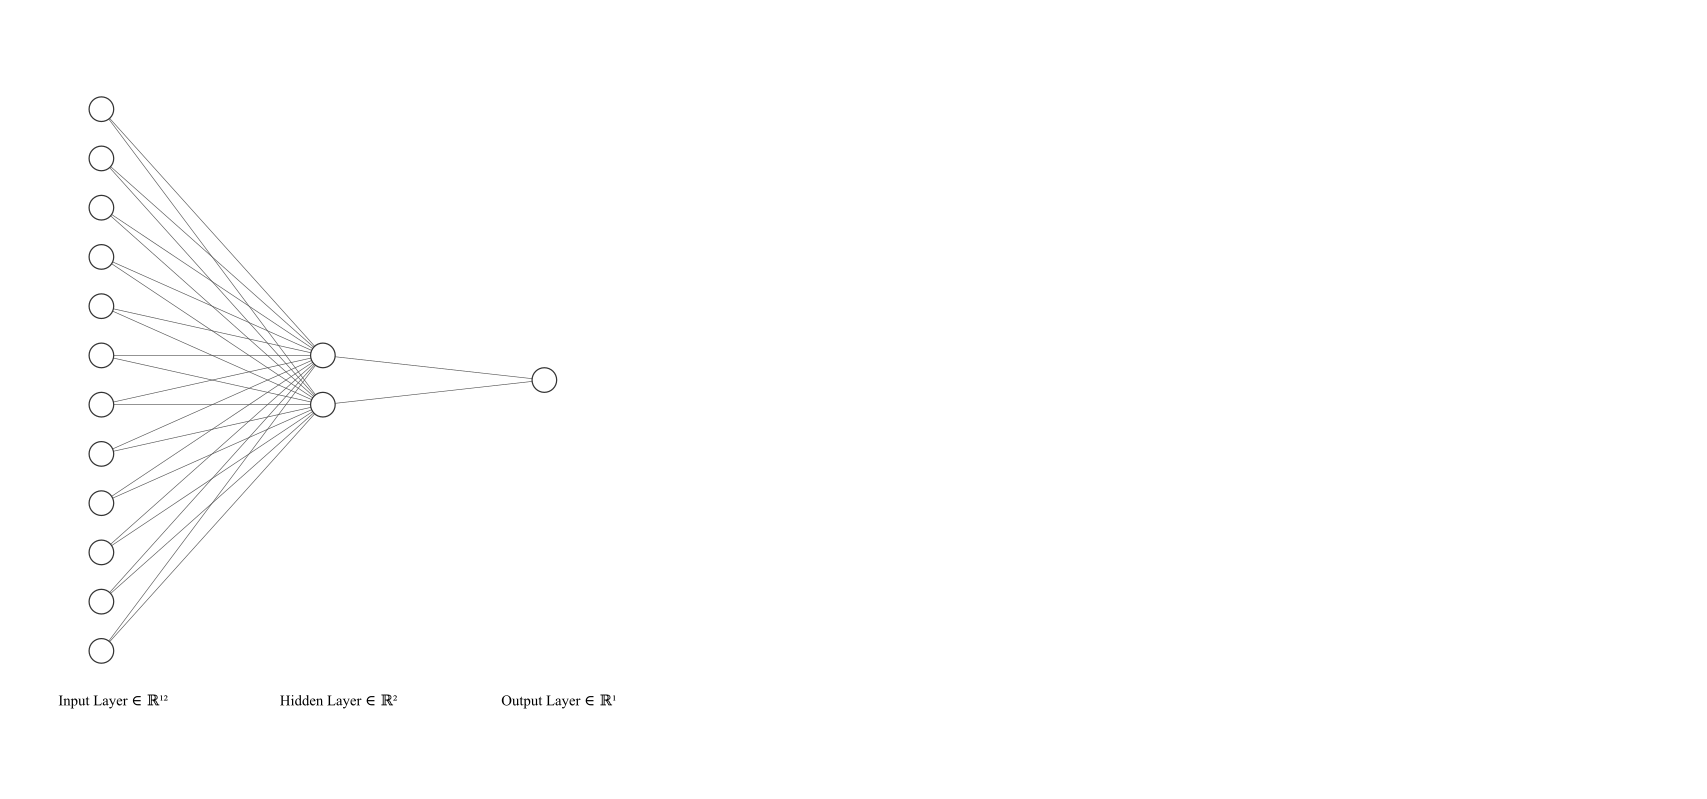

In [23]:
svg_path = '/content/drive/MyDrive/Colab Notebooks/nn (1).svg'
display(SVG(svg_path))


In [24]:
#Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit training data to the model
model_1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
143/143 [==============================] - 2s 5ms/step - loss: 17.4347 - accuracy: 0.7539 - val_loss: 13.5521 - val_accuracy: 0.7538
Epoch 2/10
143/143 [==============================] - 0s 2ms/step - loss: 9.5900 - accuracy: 0.7539 - val_loss: 6.5230 - val_accuracy: 0.7549
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 3.8986 - accuracy: 0.7873 - val_loss: 2.1538 - val_accuracy: 0.8236
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 1.1689 - accuracy: 0.8790 - val_loss: 0.5597 - val_accuracy: 0.9087
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.9221 - val_loss: 0.3245 - val_accuracy: 0.9149
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.9021 - val_loss: 0.3135 - val_accuracy: 0.9082
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.9019 - val_loss: 0.3079 - val_accuracy: 0.9123
Epoc

In [25]:
# Evaluate model on the test data 
loss, accuracy = model_1.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

61/61 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9205
Test Loss: 0.2937
Test Accuracy: 0.9205


# Model building 2 (additional neurons)
The second model adds on 2 more neuraons to the first layer, everything else remain the same. The architecture of the model is such that:
* Fully connected neural network (Dense)
* First layer   - 4 neurons -AF: RELU
* Second layer  - 1 neuron  -AF: Sigmoid

Note: Test results coming from this model has significantly improved commpared to the first moodel



In [26]:
# Define the model:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=12, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


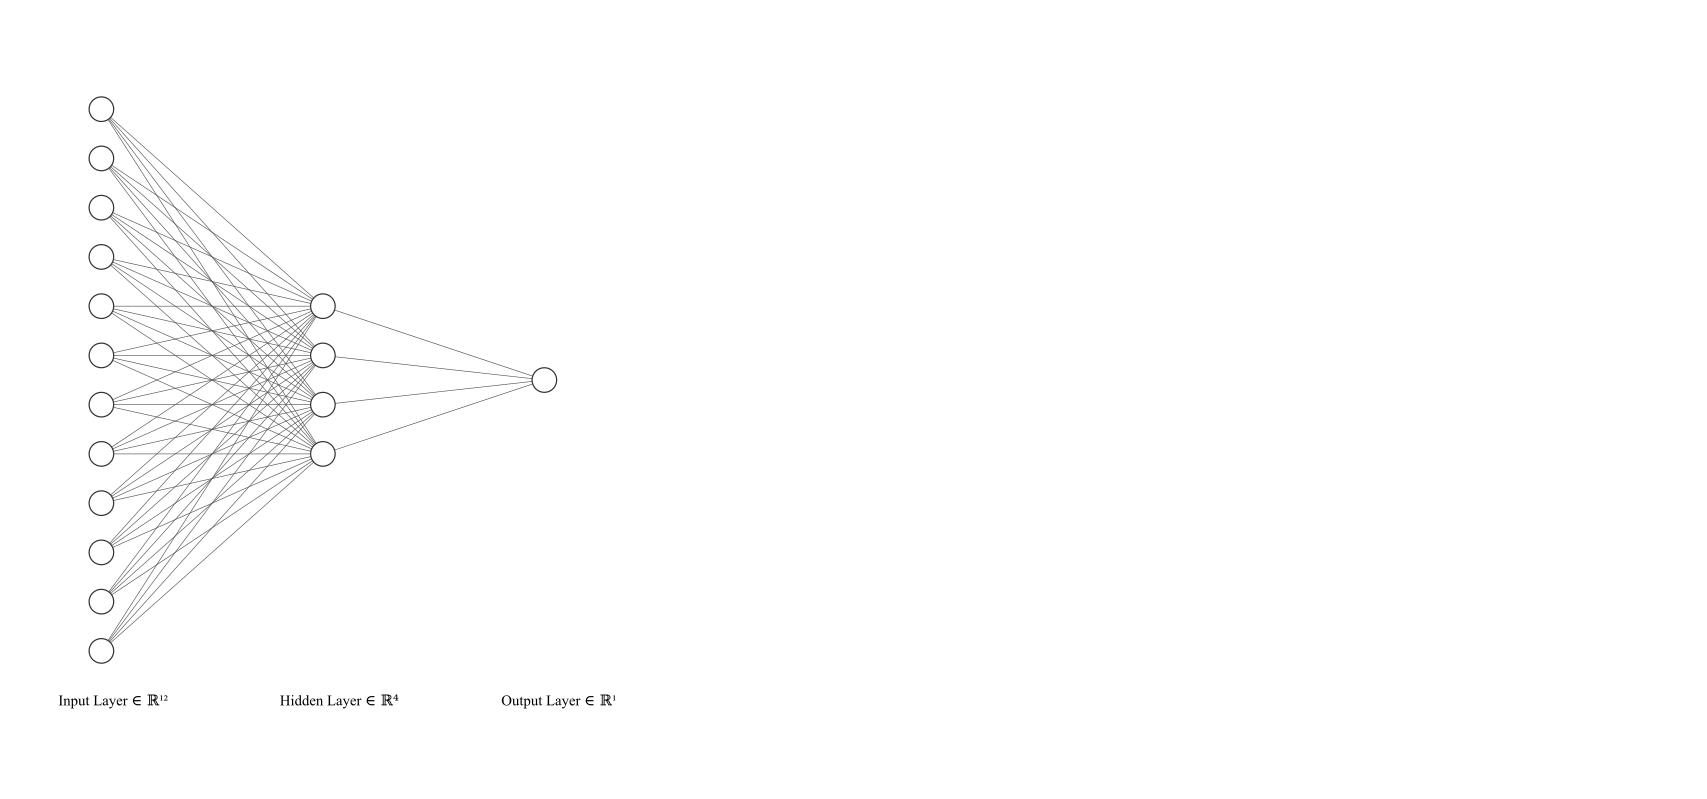

In [27]:
svg2_path = '/content/drive/MyDrive/Colab Notebooks/nn (2).svg'
display(SVG(svg2_path))

In [28]:
#Compile the model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit training data to the model
model_2.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
143/143 [==============================] - 2s 6ms/step - loss: 0.5316 - accuracy: 0.7539 - val_loss: 0.3516 - val_accuracy: 0.7538
Epoch 2/10
143/143 [==============================] - 1s 4ms/step - loss: 0.3410 - accuracy: 0.8861 - val_loss: 0.3017 - val_accuracy: 0.9231
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.9217 - val_loss: 0.2752 - val_accuracy: 0.9318
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9329 - val_loss: 0.2593 - val_accuracy: 0.9354
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9367 - val_loss: 0.2487 - val_accuracy: 0.9385
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9404 - val_loss: 0.2405 - val_accuracy: 0.9385
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9397 - val_loss: 0.2330 - val_accuracy: 0.9400
Epoch 

In [29]:
# Evaluate model on the test data 
loss, accuracy = model_2.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

61/61 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9405
Test Loss: 0.2143
Test Accuracy: 0.9405


# Model building 3 (additional hidden layer)
The third model adds on a new hidden layer. With 2 nuerons for the first and second layer. The architecture is as follows:
* Fully connected neural network (Dense)
* First layer   - 2 neurons -AF: RELU
* Second layer  - 2 neuron  -AF: RELU
* Third layer   - 1 neuron  -AF: Sigmoid

Note: Test results from this model is quite similar to the first model, no apparent improvement of accuracy scores.



In [30]:
# Define the model:
model_3 = Sequential()
model_3.add(Dense(2, input_dim=12, activation='relu'))
model_3.add(Dense(2, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 26        
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


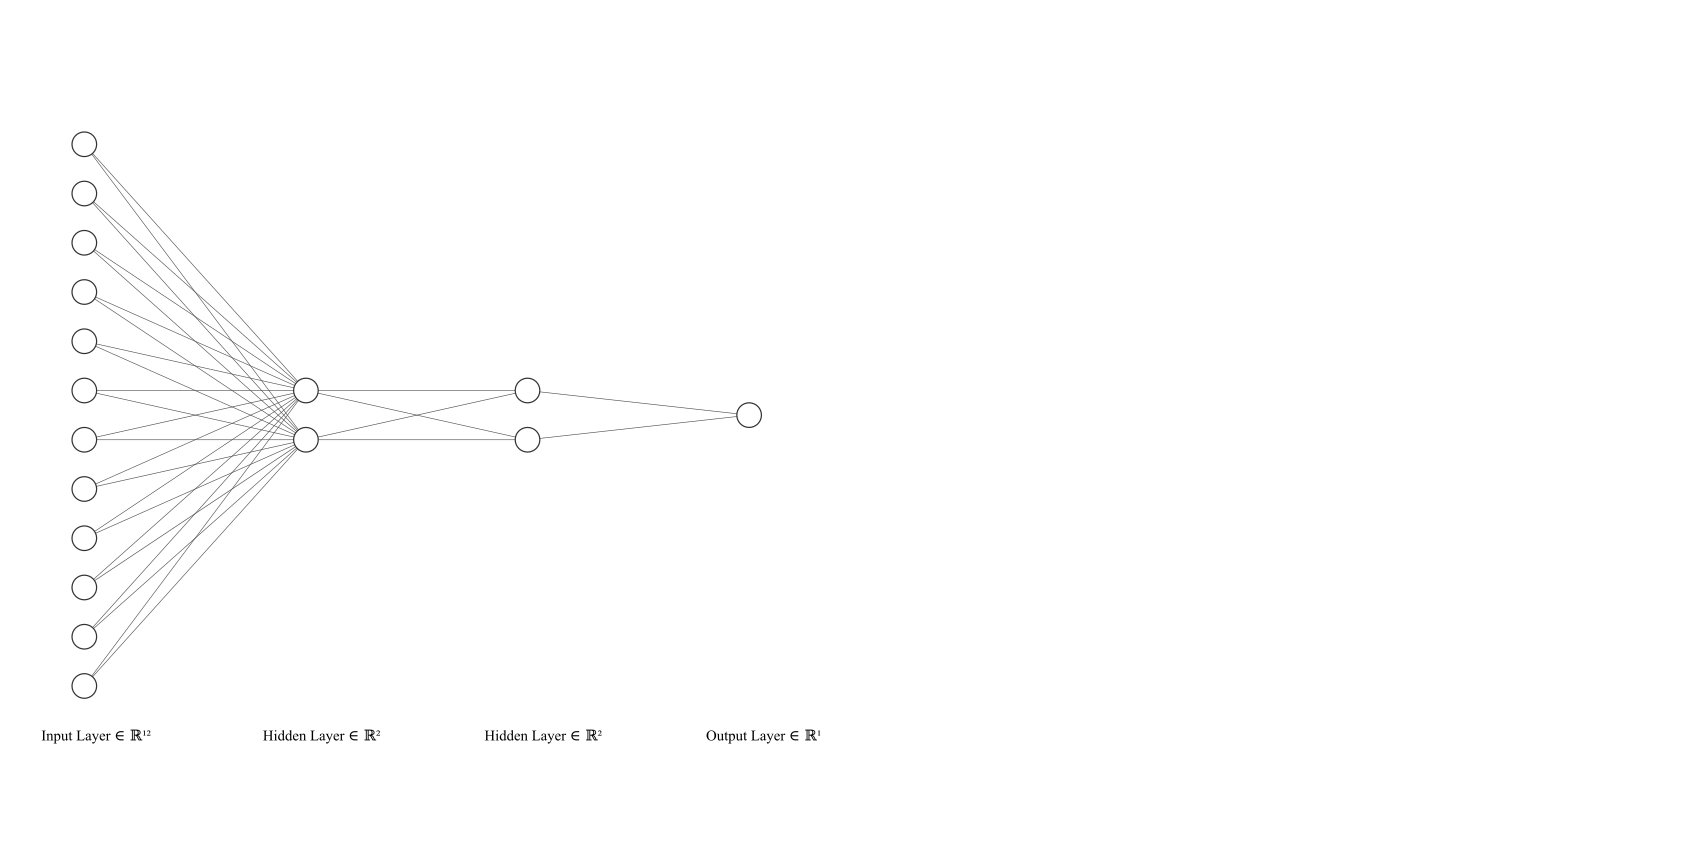

In [31]:
svg3_path = '/content/drive/MyDrive/Colab Notebooks/nn (3).svg'
display(SVG(svg3_path))


In [32]:
#Compile the model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit training data to the model
model_3.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
143/143 [==============================] - 1s 4ms/step - loss: 0.6770 - accuracy: 0.7537 - val_loss: 0.6614 - val_accuracy: 0.7538
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.7537 - val_loss: 0.6363 - val_accuracy: 0.7538
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.7537 - val_loss: 0.6164 - val_accuracy: 0.7538
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7539 - val_loss: 0.6010 - val_accuracy: 0.7538
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7539 - val_loss: 0.5891 - val_accuracy: 0.7538
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7539 - val_loss: 0.5804 - val_accuracy: 0.7538
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7539 - val_loss: 0.5737 - val_accuracy: 0.7538
Epoch 

In [33]:
# Evaluate model on the test data 
loss, accuracy = model_3.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

61/61 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7538
Test Loss: 0.5629
Test Accuracy: 0.7538


# Model building 4 (experimenting with hyperbolic tan AF)
The fourth model attempts to use a different actvation function, the hyperbolic tan function. Since model_2 returns the highest test score so far, the architecture follows the second model with:

* Fully connected neural network (Dense)
* First layer   - 4 neurons -AF: tanh
* Second layer  - 1 neuron  -AF: Sigmoid

Note: A higher test score is obtained, slighth improvement from model_2

In [34]:
# Define the model:
model_4 = Sequential()
model_4.add(Dense(4, input_dim=12, activation='tanh'))
model_4.add(Dense(1, activation='sigmoid'))
print(model_4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 52        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


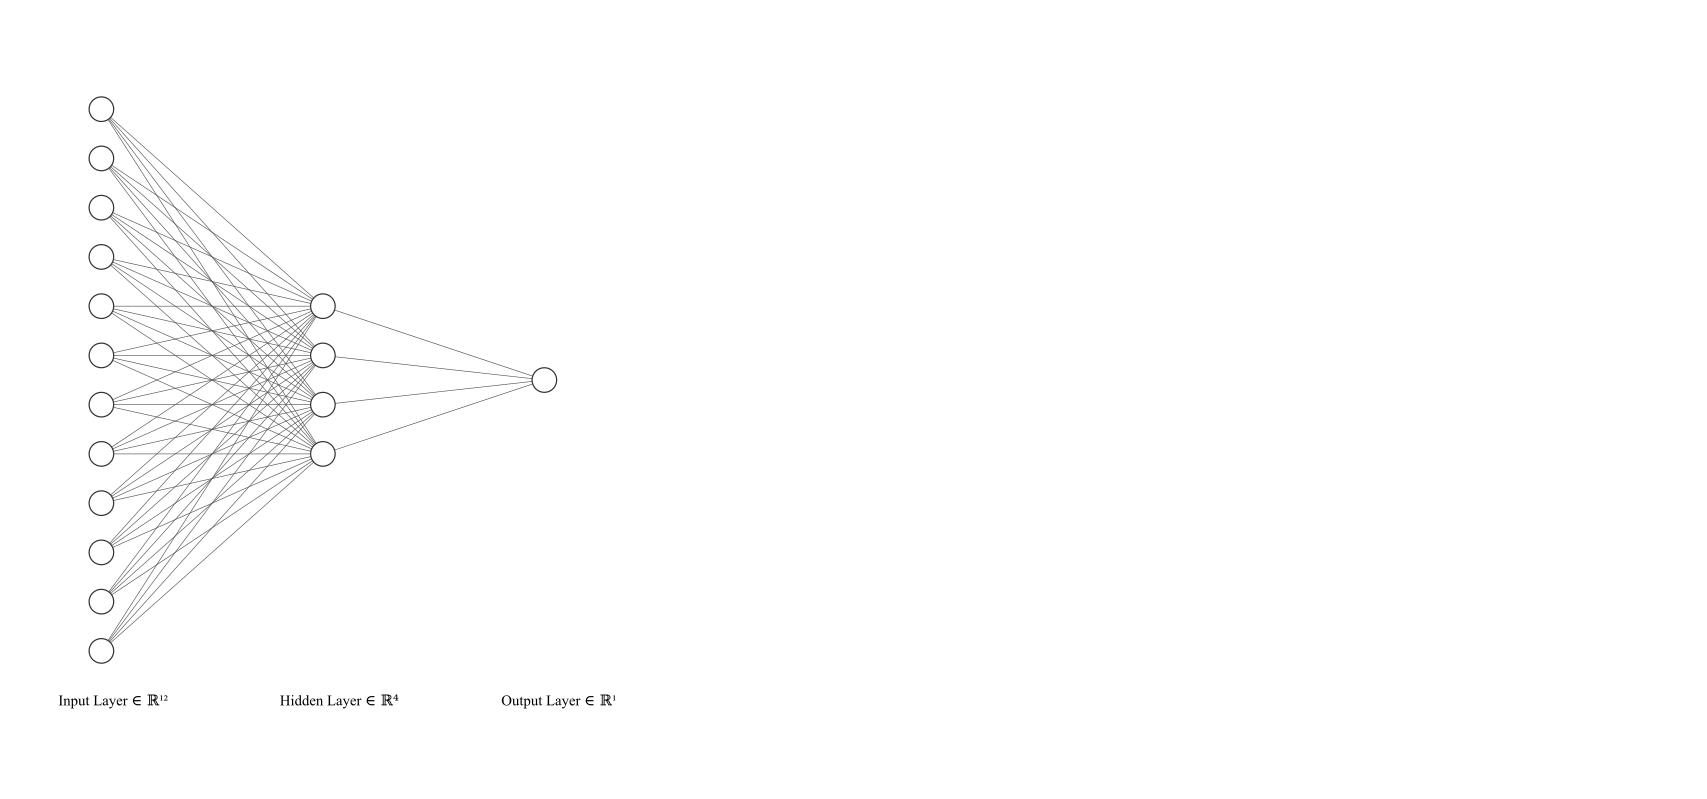

In [35]:
svg4_path = '/content/drive/MyDrive/Colab Notebooks/nn (2).svg'
display(SVG(svg4_path))


In [36]:
#Compile the model
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit training data to the model
model_4.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
143/143 [==============================] - 2s 6ms/step - loss: 0.8293 - accuracy: 0.2410 - val_loss: 0.7174 - val_accuracy: 0.2431
Epoch 2/10
143/143 [==============================] - 1s 4ms/step - loss: 0.6565 - accuracy: 0.6747 - val_loss: 0.6116 - val_accuracy: 0.7538
Epoch 3/10
143/143 [==============================] - 1s 4ms/step - loss: 0.5899 - accuracy: 0.7539 - val_loss: 0.5742 - val_accuracy: 0.7538
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7539 - val_loss: 0.5622 - val_accuracy: 0.7538
Epoch 5/10
143/143 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7539 - val_loss: 0.5590 - val_accuracy: 0.7538
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7539 - val_loss: 0.5098 - val_accuracy: 0.7538
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7539 - val_loss: 0.4521 - val_accuracy: 0.7538
Epoch 

In [37]:
# Evaluate model on the test data 
loss, accuracy = model_4.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

61/61 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.7538
Test Loss: 0.3515
Test Accuracy: 0.7538


# Model building 5 (experimenting with RMSprop optimizer)
The fifth model attempts to use a different optimizer when compiling the model, the RMSprop optimizer. The architecture are as follows:

* Fully connected neural network (Dense)
* First layer   - 4 neurons -AF: RELU
* Second layer  - 1 neuron  -AF: Sigmoid

Note: the test score are considerably high, similar to model_4


In [38]:
# Define the model:
model_5 = Sequential()
model_5.add(Dense(4, input_dim=12, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))
print(model_5.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 52        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


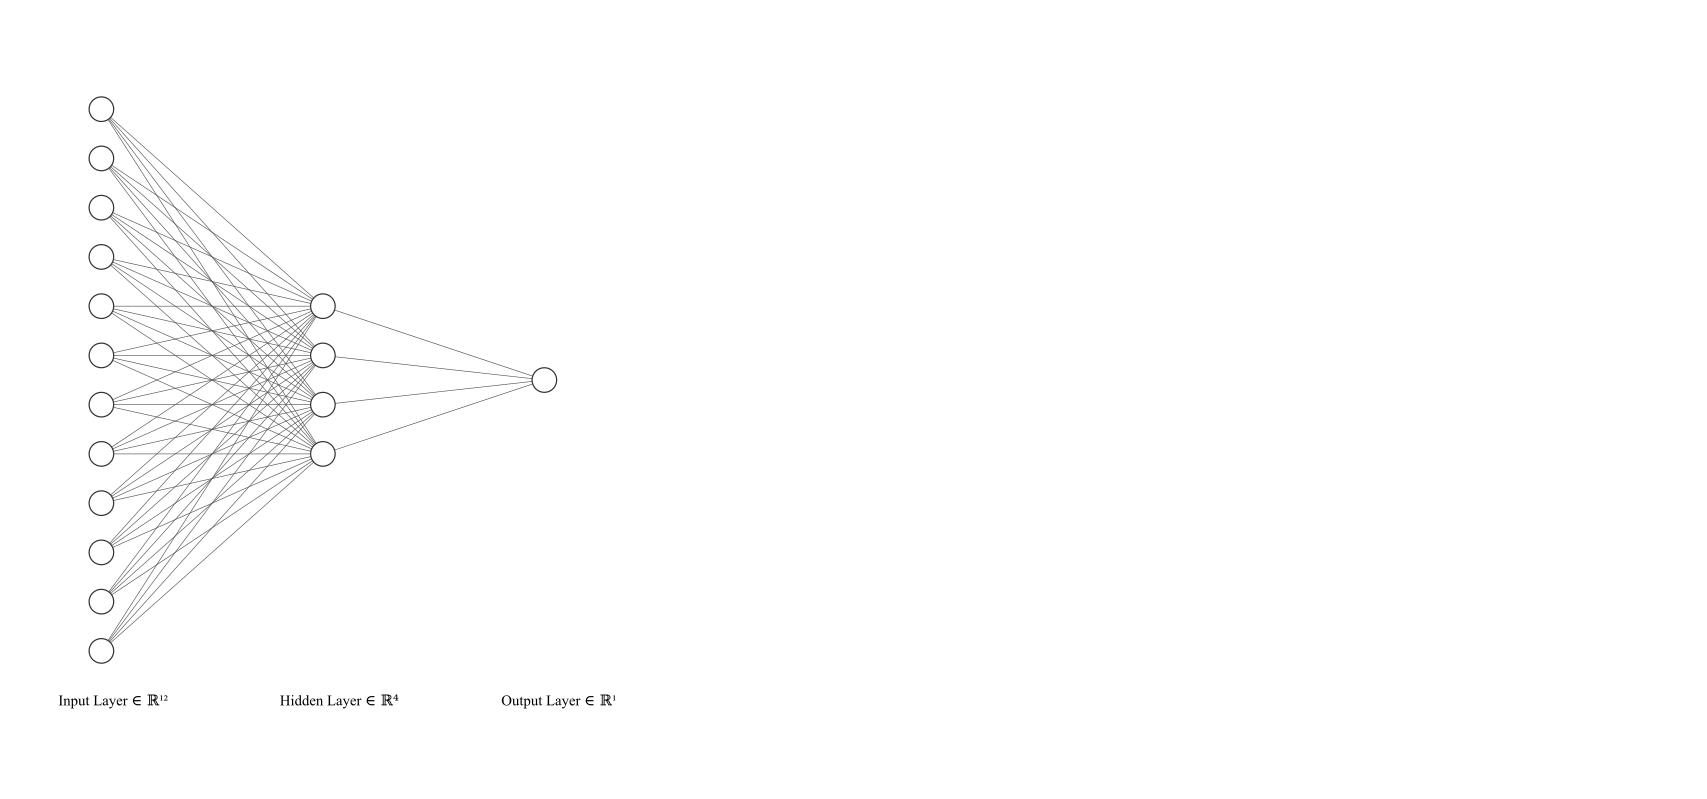

In [39]:
svg4_path = '/content/drive/MyDrive/Colab Notebooks/nn (2).svg'
display(SVG(svg4_path))


In [40]:
#Compile the model
model_5.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Fit training data to the model
model_5.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
143/143 [==============================] - 1s 4ms/step - loss: 11.0738 - accuracy: 0.3708 - val_loss: 3.4965 - val_accuracy: 0.6641
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: 2.5259 - accuracy: 0.6666 - val_loss: 1.6629 - val_accuracy: 0.6810
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 1.0030 - accuracy: 0.7484 - val_loss: 0.5899 - val_accuracy: 0.7949
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8709 - val_loss: 0.2695 - val_accuracy: 0.8954
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9215 - val_loss: 0.1848 - val_accuracy: 0.9344
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9397 - val_loss: 0.2782 - val_accuracy: 0.8897
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1687 - accuracy: 0.9439 - val_loss: 0.1474 - val_accuracy: 0.9503
Epoch

In [41]:
# Evaluate model on the test data 
loss, accuracy = model_5.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

61/61 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.9564
Test Loss: 0.1484
Test Accuracy: 0.9564


#Tuning Model 4 and 5
Since Model_4 and Model_5 has the highest test score so far, hyperparameter tuning will be performed on the combination of both models.
The new model will be using the tanh activation function whilst optimized using the RMSprop optimizer. 
* Fully connected neural network (Dense)
* First layer   - 4 neurons -AF: tanh
* Second layer  - 2 neuron  -AF: Sigmoid

GirdSeach is also utilized to find the best parameters to fit the model.



In [42]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the function to create the model
def create_model(hidden_units=4, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(4, input_dim=12, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    return model

# Wrap the model creation function in KerasClassifier
keras_model = KerasClassifier(build_fn=create_model)

# Define the parameter grid
param_grid = {
    'hidden_units': [4, 8, 16],
    'learning_rate': [0.1, 0.01, 0.001],
    'batch_size': [20, 32, 64],
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=5)

# Fit the training data to perform the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


<ipython-input-42-a35e2114ddea>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)


228/228 [==============================] - 1s 2ms/step - loss: 0.6094 - accuracy: 0.7539
{'batch_size': 20, 'hidden_units': 4, 'learning_rate': 0.001}
0.8748425364494323


In [48]:
# Get the best parameters
best_params = grid_search.best_params_

# Create a new model with the best parameters
best_model = create_model(hidden_units=best_params['hidden_units'], learning_rate=best_params['learning_rate'])

# Train the best model on the entire training set
best_model.fit(x_train, y_train, epochs=10, batch_size=best_params['batch_size'])

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


Epoch 1/10
228/228 [==============================] - 1s 3ms/step - loss: 0.5789 - accuracy: 0.7447
Epoch 2/10
228/228 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8790
Epoch 3/10
228/228 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8940
Epoch 4/10
228/228 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8997
Epoch 5/10
228/228 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9074
Epoch 6/10
228/228 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9133
Epoch 7/10
228/228 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9173
Epoch 8/10
228/228 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9239
Epoch 9/10
228/228 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9248
Epoch 10/10
61/61 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9303
T

#Evaluation Analysis

After performing the hyperparamter tunings, the accuracy test score did not see any significant improvement. This is likely due to my lack of understanding on the tuning techniques. The following is a confusion matrix to evaluate the final model.

In [44]:
from sklearn.metrics import confusion_matrix

# Predict the classes for the test set
y_pred = best_model.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)


61/61 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1470    0]
 [ 480    0]]


In [45]:
import numpy as np

# Define the confusion matrix
confusion_matrix = np.array([[1442, 28], [101, 379]])

# Calculate the True Positives, True Negatives, False Positives, and False Negatives
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

# Calculate accuracy
accuracy = (TP + TN) / np.sum(confusion_matrix)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall (also known as sensitivity or true positive rate)
recall = TP / (TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)


Accuracy: 0.9338461538461539
Precision: 0.9312039312039312
Recall: 0.7895833333333333
Specificity: 0.9809523809523809


##Break down of the confusion matrix:

True Positives (TP): 379.\
True Negatives (TN): 1442.\
False Positives (FP):28.\
False Negatives (FN): 101.\
Accuracy: 0.9338461538461539\
Precision: 0.9312039312039312\
Recall: 0.7895833333333333\
Specificity: 0.9809523809523809\